<h2><center>Mid Term-Part B</center><h2>
<h4><center>Submission by Chitrank Dave (8938766)</center></h4>

### **California Housing Prices Prediction**

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
# Loading the dataset
housing_ds = pd.read_csv(
    "../../practical_labs/datasets/MidTerm-PartB/housing_dataset.csv")

In [217]:
housing_ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [218]:
housing_ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20629.000000,20625.000000,20433.000000,20621.000000,20626.000000,20632.000000,20560.000000
mean,-119.569704,35.631861,28.633380,2636.314812,537.870553,1425.785510,499.675555,3.871003,207334.239348
std,2.003532,2.135952,12.584167,2182.184573,421.385070,1132.799376,382.405161,1.899969,115352.171422
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563400,120600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535250,180400.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,265225.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---
#### Data Preprocessing Tasks
##### **1. Detect and handle outliers for the “median_house_value” field using:**


- a. Apply the whiskers approach to identify outlier rows.

In [219]:
# Calculating median and quartile
median = housing_ds['median_house_value'].median()
q1 = housing_ds['median_house_value'].quantile(0.25)
q3 = housing_ds['median_house_value'].quantile(0.75)
print("Q1: ", q1)
print("Q3: ", q3)

# Calculating IQR
iqr = q3 - q1

# Calculating whisker bounds
whisker_lower_bound = median - (1.5 * iqr)
print("Whisker's Lower Bound: ", whisker_lower_bound)
whisker_upper_bound = median + (1.5 * iqr)
print("Whisker's Upper Bound: ", whisker_upper_bound)

# Identify outliers
outliers = housing_ds[housing_ds['median_house_value'] <
                      whisker_lower_bound] | housing_ds[housing_ds['median_house_value'] > whisker_upper_bound]
print('Number of outliers:', len(outliers))

Q1:  120600.0
Q3:  265225.0
Whisker's Lower Bound:  -36537.5
Whisker's Upper Bound:  397337.5
Number of outliers: 1798



- b. Apply Z-score normalization and choose appropriate threshold to match the

In [220]:

mean = housing_ds['median_house_value'].mean()
std = housing_ds['median_house_value'].std()

# Calculating Z-scores
z_scores = (housing_ds['median_house_value'] - mean) / std
print(z_scores)

threshold = 3

# Identifying outliers
outliers = housing_ds[z_scores > threshold]
print('Number of outliers:', len(outliers))

0       -1.667374
1       -1.667374
2       -1.667374
3       -1.667374
4       -1.645693
           ...   
20635    2.537159
20636    2.537159
20637    2.537159
20638    2.537159
20639    2.537159
Name: median_house_value, Length: 20640, dtype: float64
Number of outliers: 0


##### **2. Handle missing values in the dataset:**


In [221]:
def check_print_missing_values():
    missing_values = housing_ds.isnull().sum()
    print(missing_values)


check_print_missing_values()

longitude               0
latitude                0
housing_median_age     11
total_rooms            15
total_bedrooms        207
population             19
households             14
median_income           8
median_house_value     80
ocean_proximity       154
dtype: int64


- a. For numerical features:
    - i. Choose whether mean/median is better to impute the values
    - ii.look for other ways to impute based on other categorical variables

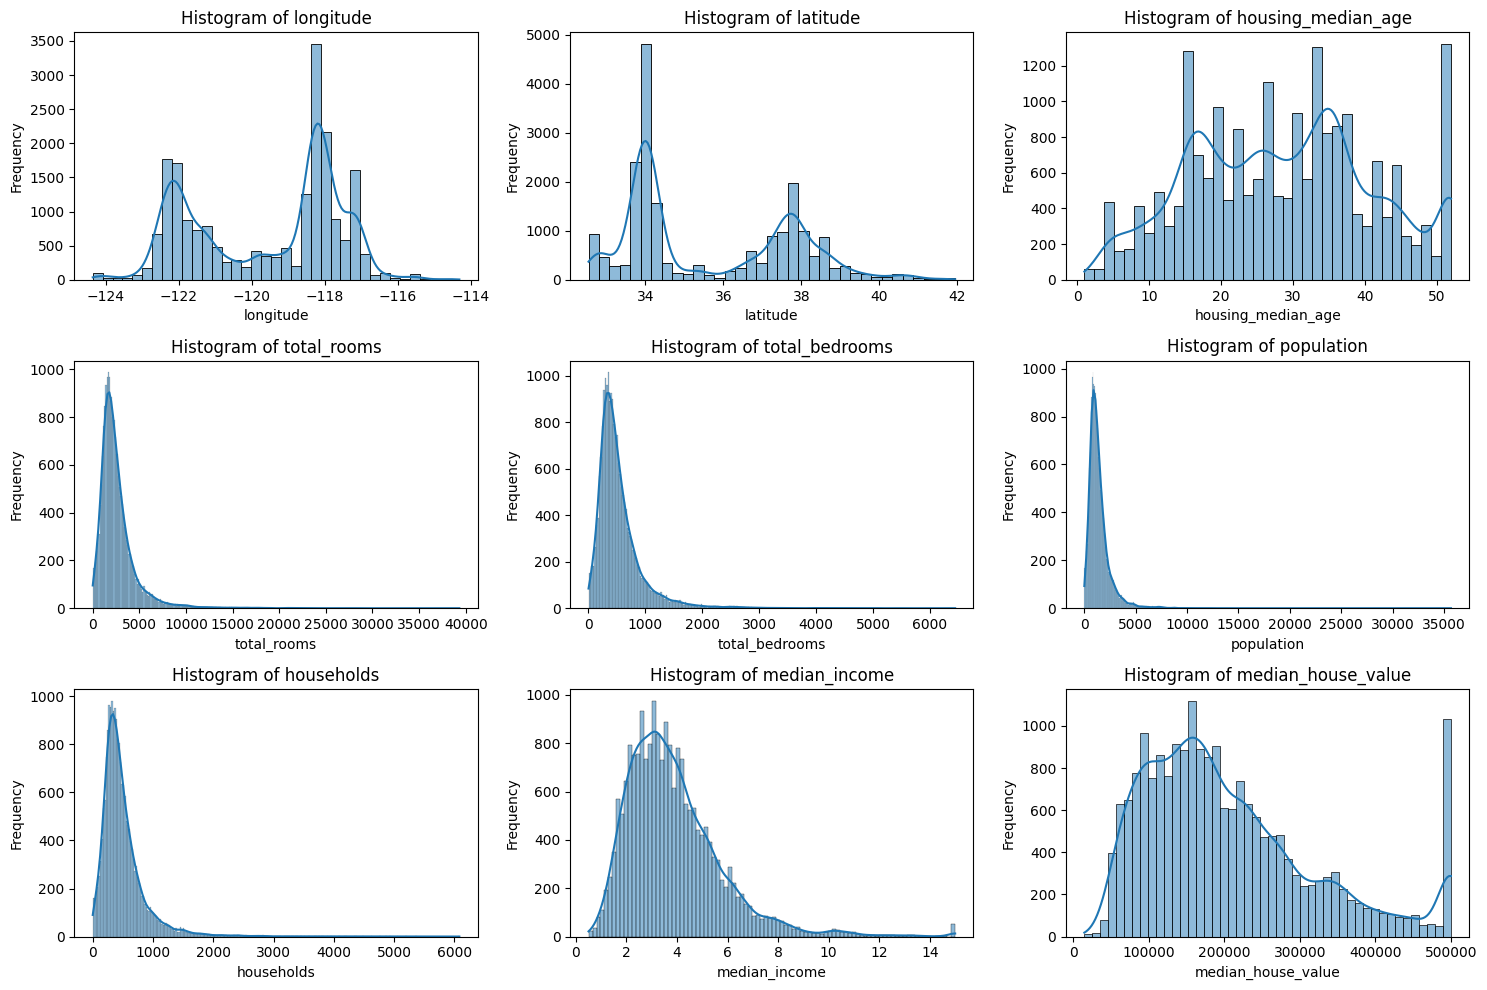

In [222]:
def plot_hist_for_all_feat(df, row_num, col_num):
    fig, axes = plt.subplots(row_num, col_num, figsize=(15, 10))

    for i in range(row_num):
        for j in range(col_num):
            index = i * col_num + j
            if index < len(df.columns) and df[df.columns[index]].dtype in [int, float]:
                sns.histplot(df[df.columns[index]], kde=True, ax=axes[i, j])
                axes[i, j].set_title(f'Histogram of {df.columns[index]}')
                axes[i, j].set_xlabel(df.columns[index])
                axes[i, j].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


plot_hist_for_all_feat(housing_ds, 3, int(len(housing_ds.columns) / 3))

I chose using median to impute the missing values in all fields except 'ocean_proximity' (as it is catagorical data). This is because the histogram is skewed to the right, which means that the median is a better representation of the central value of the data than the mean.

In [223]:
def fill_data(feature_name):
    if housing_ds[feature_name].dtype != 'object':
        housing_ds[feature_name].fillna(
            housing_ds[feature_name].median(), inplace=True)

In [224]:
for col in housing_ds:
    if housing_ds[col].isnull().sum() > 0:
        fill_data(col)

print('Updated dataset')
check_print_missing_values()

Updated dataset
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms          0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity       154
dtype: int64



- b. For categorical features: Choose the appropriate imputation method.

In [225]:
# Impute missing values in ocean_proximity feature with the most frequent category
housing_ds['ocean_proximity'].fillna(
    housing_ds['ocean_proximity'].mode()[0], inplace=True)

print('Updated dataset')
check_print_missing_values()

Updated dataset
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [226]:
print("Updated Dataset after all fill in: \n")
check_print_missing_values()

Updated Dataset after all fill in: 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


##### **3. Investigate the existence of errors/inconsistencies in the fields and solve them**

In [227]:
housing_ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.633576,2635.944671,536.838857,1425.546366,499.614729,3.870873,207229.843072
std,2.003532,2.135952,12.580816,2181.434626,419.391878,1132.305245,382.282571,1.899613,115140.557157
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.750000,297.000000,788.000000,280.000000,2.563975,120800.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,410.000000,3.535250,180400.000000
75%,-118.010000,37.710000,37.000000,3146.250000,643.250000,1724.000000,605.000000,4.742725,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [228]:
housing_ds['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9212
INLAND        6490
NEAR OCEAN    2647
NEAR BAY      2239
NEAR_bay        32
inland          15
ISLAND           5
Name: count, dtype: int64

In [229]:
# for x in housing_ds['ocean_proximity']:
#     if 'bay' in x or 'BAY' in x:
#         print(x)
filtered_rows = housing_ds[housing_ds['ocean_proximity'].str.contains(
    'near', case=False)]
filtered_rows.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,22500.0,NEAR BAY
7,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,NEAR OCEAN
13,-120.59,34.70,29.0,17738.0,3114.0,12427.0,2826.0,2.7377,28300.0,NEAR OCEAN
18,-122.41,37.78,52.0,1014.0,422.0,1055.0,382.0,1.8519,32500.0,NEAR BAY
30,-119.85,34.40,14.0,2307.0,650.0,5723.0,615.0,2.1652,37500.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
1812,-117.12,32.70,37.0,1361.0,348.0,1398.0,328.0,1.1681,78100.0,NEAR OCEAN
1818,-124.22,41.73,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0,NEAR OCEAN
1824,-122.30,37.81,52.0,1010.0,209.0,604.0,187.0,1.1667,78400.0,NEAR_bay
1826,-124.10,40.95,17.0,1485.0,345.0,823.0,316.0,1.8993,78400.0,NEAR OCEAN


In [230]:
housing_ds['ocean_proximity'].replace('inland', 'INLAND', inplace=True)
housing_ds['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9212
INLAND        6505
NEAR OCEAN    2647
NEAR BAY      2239
NEAR_bay        32
ISLAND           5
Name: count, dtype: int64

In [231]:
housing_ds['ocean_proximity'].replace('NEAR_bay', 'NEAR BAY', inplace=True)
housing_ds['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9212
INLAND        6505
NEAR OCEAN    2647
NEAR BAY      2271
ISLAND           5
Name: count, dtype: int64

In [232]:
# Check data integrity for "total_rooms" and "total_bedrooms"
invalid_rows = housing_ds[housing_ds['total_rooms']
                          < housing_ds['total_bedrooms']]
invalid_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1409,-120.85,37.78,25.0,421.0,435.0,303.0,106.0,2.2679,71300.0,INLAND
2768,-117.28,34.09,44.0,376.0,435.0,273.0,107.0,2.2917,90800.0,INLAND
5550,-121.85,36.61,38.0,238.0,435.0,191.0,67.0,1.3897,125000.0,<1H OCEAN
11890,-119.11,35.42,52.0,154.0,435.0,37.0,16.0,10.0263,200000.0,INLAND
12832,-122.23,38.17,45.0,350.0,435.0,225.0,72.0,1.8942,216700.0,NEAR BAY


In [233]:
cleaned_housing_ds = housing_ds.drop(invalid_rows.index)
cleaned_housing_ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
1,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
3,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
4,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20636,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20637,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20638,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


##### **4. Normalize numerical features using appropriate method based on feature characteristics.**

In [234]:
scaler = StandardScaler()


def normalize_numerical_data():
    for feature_name in cleaned_housing_ds:
        if cleaned_housing_ds[feature_name].dtype != 'object':
            cleaned_housing_ds[feature_name] = scaler.fit_transform(
                cleaned_housing_ds[[feature_name]])


normalize_numerical_data()
cleaned_housing_ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.582469,1.909334,-1.004039,-1.091762,-1.105939,-1.184223,-1.207858,-1.163826,-1.669629,INLAND
1,1.272546,0.359705,-0.765562,-0.924892,-0.710163,-0.826529,-0.878241,-0.932508,-1.669629,INLAND
2,0.853278,-0.651533,1.857688,-0.840541,-0.643406,-0.704649,-0.718665,0.169686,-1.669629,INLAND
3,-1.797094,2.190233,0.585809,-1.163736,-1.213228,-1.243397,-1.286338,-1.756047,-1.669629,INLAND
4,0.618688,-0.693668,0.824286,-0.982655,-0.879441,-1.030547,-0.946257,-0.792075,-1.647908,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,0.334185,-0.698350,0.506317,-0.519638,-0.652943,-0.750575,-0.742209,0.671234,2.542523,<1H OCEAN
20636,0.439002,-0.679623,-1.401501,-0.669087,-0.950967,-0.892769,-0.995961,3.252166,2.542523,<1H OCEAN
20637,0.384098,-0.674941,-1.957948,5.930054,4.017687,3.593854,4.322384,2.516404,2.542523,<1H OCEAN
20638,0.439002,-0.665578,-1.480993,0.470577,-0.304851,-0.218009,-0.336727,4.565827,2.542523,<1H OCEAN


##### **5. Encode categorical variables using using appropriate method based on feature characteristics.**

In [235]:
encoder = OneHotEncoder()

ocean_proximity_encoded = pd.get_dummies(
    cleaned_housing_ds['ocean_proximity'], prefix='ocean_proximity')
cleaned_housing_ds_new = pd.concat(
    [cleaned_housing_ds, ocean_proximity_encoded], axis=1)

cleaned_housing_ds_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.582469,1.909334,-1.004039,-1.091762,-1.105939,-1.184223,-1.207858,-1.163826,-1.669629,INLAND,False,True,False,False,False
1,1.272546,0.359705,-0.765562,-0.924892,-0.710163,-0.826529,-0.878241,-0.932508,-1.669629,INLAND,False,True,False,False,False
2,0.853278,-0.651533,1.857688,-0.840541,-0.643406,-0.704649,-0.718665,0.169686,-1.669629,INLAND,False,True,False,False,False
3,-1.797094,2.190233,0.585809,-1.163736,-1.213228,-1.243397,-1.286338,-1.756047,-1.669629,INLAND,False,True,False,False,False
4,0.618688,-0.693668,0.824286,-0.982655,-0.879441,-1.030547,-0.946257,-0.792075,-1.647908,<1H OCEAN,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.334185,-0.698350,0.506317,-0.519638,-0.652943,-0.750575,-0.742209,0.671234,2.542523,<1H OCEAN,True,False,False,False,False
20636,0.439002,-0.679623,-1.401501,-0.669087,-0.950967,-0.892769,-0.995961,3.252166,2.542523,<1H OCEAN,True,False,False,False,False
20637,0.384098,-0.674941,-1.957948,5.930054,4.017687,3.593854,4.322384,2.516404,2.542523,<1H OCEAN,True,False,False,False,False
20638,0.439002,-0.665578,-1.480993,0.470577,-0.304851,-0.218009,-0.336727,4.565827,2.542523,<1H OCEAN,True,False,False,False,False


In [236]:
cleaned_housing_ds_new = cleaned_housing_ds_new.drop('ocean_proximity', axis=1)
cleaned_housing_ds_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.582469,1.909334,-1.004039,-1.091762,-1.105939,-1.184223,-1.207858,-1.163826,-1.669629,False,True,False,False,False
1,1.272546,0.359705,-0.765562,-0.924892,-0.710163,-0.826529,-0.878241,-0.932508,-1.669629,False,True,False,False,False
2,0.853278,-0.651533,1.857688,-0.840541,-0.643406,-0.704649,-0.718665,0.169686,-1.669629,False,True,False,False,False
3,-1.797094,2.190233,0.585809,-1.163736,-1.213228,-1.243397,-1.286338,-1.756047,-1.669629,False,True,False,False,False
4,0.618688,-0.693668,0.824286,-0.982655,-0.879441,-1.030547,-0.946257,-0.792075,-1.647908,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.334185,-0.698350,0.506317,-0.519638,-0.652943,-0.750575,-0.742209,0.671234,2.542523,True,False,False,False,False
20636,0.439002,-0.679623,-1.401501,-0.669087,-0.950967,-0.892769,-0.995961,3.252166,2.542523,True,False,False,False,False
20637,0.384098,-0.674941,-1.957948,5.930054,4.017687,3.593854,4.322384,2.516404,2.542523,True,False,False,False,False
20638,0.439002,-0.665578,-1.480993,0.470577,-0.304851,-0.218009,-0.336727,4.565827,2.542523,True,False,False,False,False


##### **6. Engineer one new feature based on existing features.**

In [237]:
cleaned_housing_ds_new['median_house_value_to_income_ratio'] = cleaned_housing_ds_new['median_house_value'] / \
    cleaned_housing_ds_new['median_income']
cleaned_housing_ds_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value_to_income_ratio
0,-1.582469,1.909334,-1.004039,-1.091762,-1.105939,-1.184223,-1.207858,-1.163826,-1.669629,False,True,False,False,False,1.434604
1,1.272546,0.359705,-0.765562,-0.924892,-0.710163,-0.826529,-0.878241,-0.932508,-1.669629,False,True,False,False,False,1.790471
2,0.853278,-0.651533,1.857688,-0.840541,-0.643406,-0.704649,-0.718665,0.169686,-1.669629,False,True,False,False,False,-9.839495
3,-1.797094,2.190233,0.585809,-1.163736,-1.213228,-1.243397,-1.286338,-1.756047,-1.669629,False,True,False,False,False,0.950788
4,0.618688,-0.693668,0.824286,-0.982655,-0.879441,-1.030547,-0.946257,-0.792075,-1.647908,True,False,False,False,False,2.080496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.334185,-0.698350,0.506317,-0.519638,-0.652943,-0.750575,-0.742209,0.671234,2.542523,True,False,False,False,False,3.787832
20636,0.439002,-0.679623,-1.401501,-0.669087,-0.950967,-0.892769,-0.995961,3.252166,2.542523,True,False,False,False,False,0.781794
20637,0.384098,-0.674941,-1.957948,5.930054,4.017687,3.593854,4.322384,2.516404,2.542523,True,False,False,False,False,1.010379
20638,0.439002,-0.665578,-1.480993,0.470577,-0.304851,-0.218009,-0.336727,4.565827,2.542523,True,False,False,False,False,0.556859


---
#### Descriptive Analytics Tasks
##### **1. Investigate the distribution of housing prices across different ocean proximities in California.**

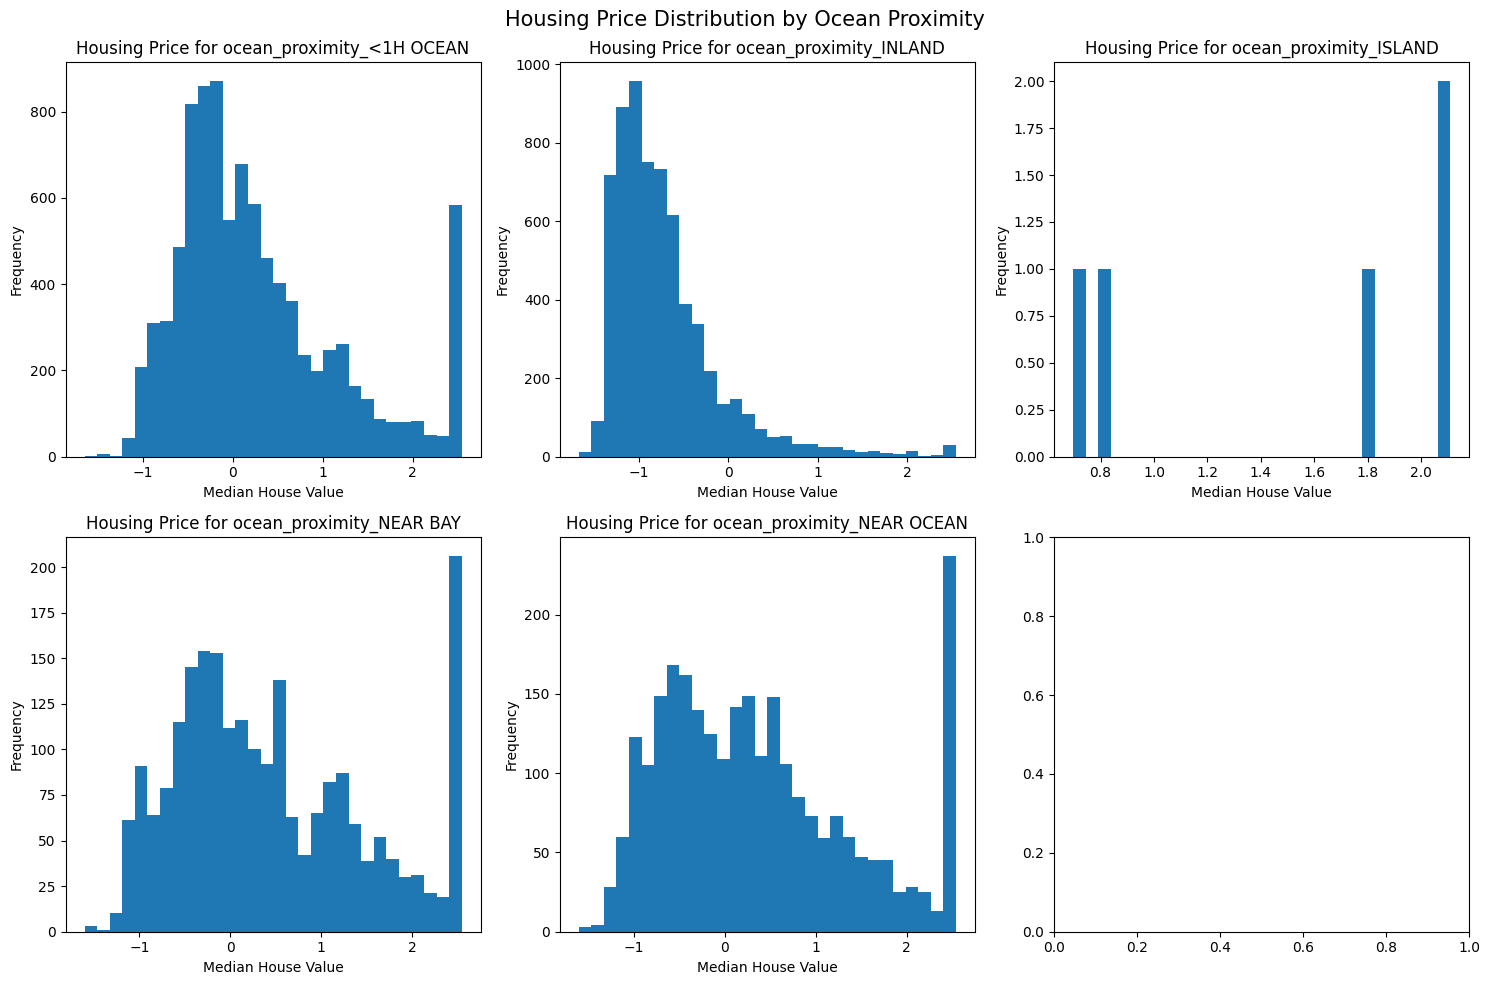

Ocean Proximity: ocean_proximity_<1H OCEAN
Mean Housing Price: $0.28
Median Housing Price: $0.06
Standard Deviation: $0.92


Ocean Proximity: ocean_proximity_INLAND
Mean Housing Price: $-0.72
Median Housing Price: $-0.86
Standard Deviation: $0.61


Ocean Proximity: ocean_proximity_ISLAND
Mean Housing Price: $1.50
Median Housing Price: $1.80
Standard Deviation: $0.70


Ocean Proximity: ocean_proximity_NEAR BAY
Mean Housing Price: $0.46
Median Housing Price: $0.24
Standard Deviation: $1.06


Ocean Proximity: ocean_proximity_NEAR OCEAN
Mean Housing Price: $0.38
Median Housing Price: $0.20
Standard Deviation: $1.06




In [238]:
features = [
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Housing Price Distribution by Ocean Proximity', fontsize=15)

price_distributions = {}

for i, column in enumerate(features):
    row, col = divmod(i, 3)
    ax = axis[row, col]
    category_data = cleaned_housing_ds_new[cleaned_housing_ds_new[column] == 1]
    ax.hist(category_data['median_house_value'], bins=30)
    ax.set_title(f'Housing Price for {column}')
    ax.set_xlabel('Median House Value')
    ax.set_ylabel('Frequency')

    price_distributions[column] = category_data['median_house_value']

plt.tight_layout()
plt.show()

for category, prices in price_distributions.items():
    print(f'Ocean Proximity: {category}')
    print(f'Mean Housing Price: ${prices.mean():,.2f}')
    print(f'Median Housing Price: ${prices.median():,.2f}')
    print(f'Standard Deviation: ${prices.std():,.2f}')
    print('\n')

##### **2. Analyze the relationship between median income and housing prices.**

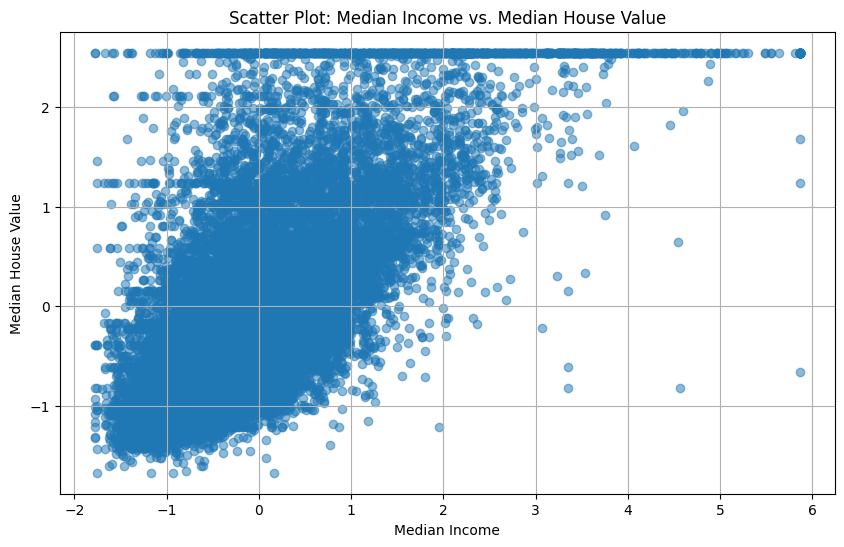

Correlation between Median Income and Median House Value is: 0.69


In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_housing_ds_new['median_income'],
            cleaned_housing_ds_new['median_house_value'], alpha=0.5)
plt.title('Scatter Plot: Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.grid()
plt.show()

correlation = cleaned_housing_ds_new['median_income'].corr(
    cleaned_housing_ds_new['median_house_value'])
print(
    f'Correlation between Median Income and Median House Value is: {correlation:.2f}')

---
### ML Model Training and Testing Tasks

##### **1. Split the cleaned data into training and testing sets**

In [240]:
X = cleaned_housing_ds_new.drop('median_house_value', axis=1)
y = cleaned_housing_ds_new['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=24)

##### **2. Train a linear regression model as a baseline model.**

In [241]:
baseline_model = LinearRegression()

baseline_model.fit(X_train, y_train)

LinearRegression()

In [242]:
y_pred = baseline_model.predict(X_test)
y_pred

array([ 0.09844732,  0.27088594,  0.25731008, ...,  0.9495295 ,
       -0.39459225, -0.02639881])

In [243]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.2f}')

MSE: 0.35
R2: 0.65


#### **3. Print the learned coefficients (weights) of the model.**
- a. Comment on which feature the model gave higher weight to in the weight vector.

In [244]:
coefficients = baseline_model.coef_
feature_coefficients = {feature: coef for feature,
                        coef in zip(X_train.columns, coefficients)}

sorted_feature_coefficients = sorted(
    feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

for feature, coef in sorted_feature_coefficients:
    print(f'{feature}: {coef:.2f}')

highest_weight_feature = sorted_feature_coefficients[0][0]
print(f"\nHighest weight feature is '{highest_weight_feature}'.")

ocean_proximity_ISLAND: 1.24
median_income: 0.63
ocean_proximity_INLAND: -0.58
latitude: -0.46
longitude: -0.46
population: -0.37
total_bedrooms: 0.34
ocean_proximity_NEAR BAY: -0.25
ocean_proximity_<1H OCEAN: -0.23
ocean_proximity_NEAR OCEAN: -0.18
households: 0.17
housing_median_age: 0.11
total_rooms: -0.10
median_house_value_to_income_ratio: -0.00

Highest weight feature is 'ocean_proximity_ISLAND'.


#### **4. Evaluate the model's performance on the test set using the following metrics:**
- a. Mean Absolute Error (MAE)
- b. Mean Squared Error (MSE)

In [248]:
print("Linear Regression:")
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Linear Regression:
Mean Absolute Error (MAE): 0.44
Mean Squared Error (MSE): 0.35


The model's accuracy is good overall, but it sometimes makes large errors because MAE of 0.44 indicates reasonably good model accuracy, but the MSE  0.35 tells there might be some cases with prediction  errors.

#### **5. Try 2 other regression algorithms and compare their performance to the linear regression baseline.**

Random Forest Regressor Model

In [246]:
random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

print("\nRandom Forest Regression:")
print(f"Mean Absolute Error (MAE): {mae_random_forest:.2f}")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")


Random Forest Regression:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.01


Support Vector Regressor Model

In [247]:
svr_model = SVR()

svr_model.fit(X_train, y_train)


y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regressor (SVR):")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")

Support Vector Regressor (SVR):
Mean Absolute Error (MAE): 0.46
Mean Squared Error (MSE): 0.45


Comparison the performance of the Random Forest Regression model and the Support Vector Regressor (SVR) based on above results:

Random Forest Regression is a more accurate model than Support Vector Regressor. It has significantly lower MAE (0.03) and MSE (0.01) values, which indicate that its predictions are, on average, much closer to the actual values and have smaller squared differences. This suggests that Random Forest Regression is a better choice for predicting out of above 2 models.


- **a. Provide a reasonable explanation on why the results are different between the linear regression model and the other models-**

Linear Regression model use different technique to learn from the data and make predictions. Some models are better at learning complex relationships between the features and the target variable. Here, linear regression model assumes a linear relationship between the features and the target variable, while other two models are focusing on more complex and non-linear relationships.